In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib
import sklearn as sk
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
import tempfile
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

In [3]:

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', names = column_names)

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
"""train_dataset = dataset.sample(frac=0.75, random_state=1)
test_dataset=dataset.drop(train_dataset.index)

x_train, y_train=train_dataset.iloc[:,2:], test_dataset.iloc[:,1:]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1:]"""

'train_dataset = dataset.sample(frac=0.75, random_state=1)\ntest_dataset=dataset.drop(train_dataset.index)\n\nx_train, y_train=train_dataset.iloc[:,2:], test_dataset.iloc[:,1:]\nx_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1:]'

In [6]:
dataset.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


In [13]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=1)
train_dataset['diagnosis'] = train_dataset['diagnosis'].map({'M': 1, 'B': 0})
test_dataset['diagnosis'] = test_dataset['diagnosis'].map({'M': 1, 'B': 0})
x_train=train_dataset.drop('diagnosis', axis=1)
y_train=train_dataset['diagnosis']
x_test=test_dataset.drop('diagnosis', axis=1)
y_test=test_dataset['diagnosis']

In [8]:
model = Sequential()
model.add(Dense(30, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [10]:
train_dataset['diagnosis'] = train_dataset['diagnosis'].map({'M': 1, 'B': 0})
test_dataset['diagnosis'] = test_dataset['diagnosis'].map({'M': 1, 'B': 0})

In [14]:
model.fit(x_train, y_train,
          epochs=100,
          validation_data=(x_test, y_test),
          verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2362359.5000 - val_loss: 452832.2812
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1843212.5000 - val_loss: 331079.3125
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1086607.5000 - val_loss: 239418.0469
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2819430.0000 - val_loss: 141677.8594
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1391413.0000 - val_loss: 85155.4766
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 887576.1875 - val_loss: 44156.7070
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1019694.3125 - val_loss: 29864.9707
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 646444.6250 - val_loss: 16651.0410
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 664788.2500 - val_loss: 87.9277
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 570689.0000 - val_loss: 1817.6097
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,325 (16.90 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,884 (11.27 KB)

<Axes: >

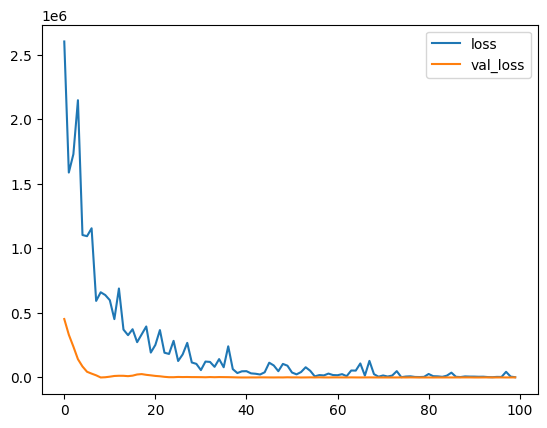

In [16]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [17]:
predictions = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [18]:
print('Model Classification Report')
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_labels))

Model Classification Report
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
